<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/Novel_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
my_path="/content/drive/MyDrive/CS491/Data/"

In [7]:
#Import the relevant libraries
import nltk
from nltk import word_tokenize, pos_tag
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
nltk.download('stopwords')
nltk.download('wordnet')
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

from IPython.display import Image, display
from nltk.tree import Tree
import string
import random

import numpy as np
from collections import Counter
from scipy.stats import linregress

import os
import re
from urllib import request

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [8]:
title = 'The Golden Bowl'
tit='Bowl'
author = 'Henry James'
url = 'https://www.gutenberg.org/cache/epub/4264/pg4264.txt'
path = my_path

# title = 'The Americans'
# tit='Americans'
# author = 'Henry James'
# url = 'https://www.gutenberg.org/cache/epub/177/pg177.txt'
# path = my_path

In [9]:
# Check if the file is stored locally
filename = my_path+ title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
        print("{title} file already exists".format(title=title))
        with open(filename, 'r') as f:
            raw = f.read()

else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)

The Golden Bowl file already exists


In the file browser to the right, open the book. The text should appear in a cell on the right. Delete preamble and postamble, then save.

In [ ]:
raw[:100]
# raw[-100:]

'       The Prince had always liked his London, when it had come to him; he was one of the modern Rom'

In [10]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [ ]:
# raw

In [11]:
all_tokens=word_tokenize(raw)#.lower())

# Word counting in so many ways!

In [ ]:
all_tokens[60:80]

['tribute',
 ',',
 'he',
 'recognised',
 'in',
 'the',
 'present',
 'London',
 'much',
 'more',
 'than',
 'in',
 'contemporary',
 'Rome',
 'the',
 'real',
 'dimensions',
 'of',
 'such',
 'a']

In [12]:
cc_tokens=[word for word in all_tokens if word.isalpha()]

In [ ]:
cc_tokens[60:80]

['in',
 'the',
 'present',
 'London',
 'much',
 'more',
 'than',
 'in',
 'contemporary',
 'Rome',
 'the',
 'real',
 'dimensions',
 'of',
 'such',
 'a',
 'case',
 'If',
 'it',
 'was']

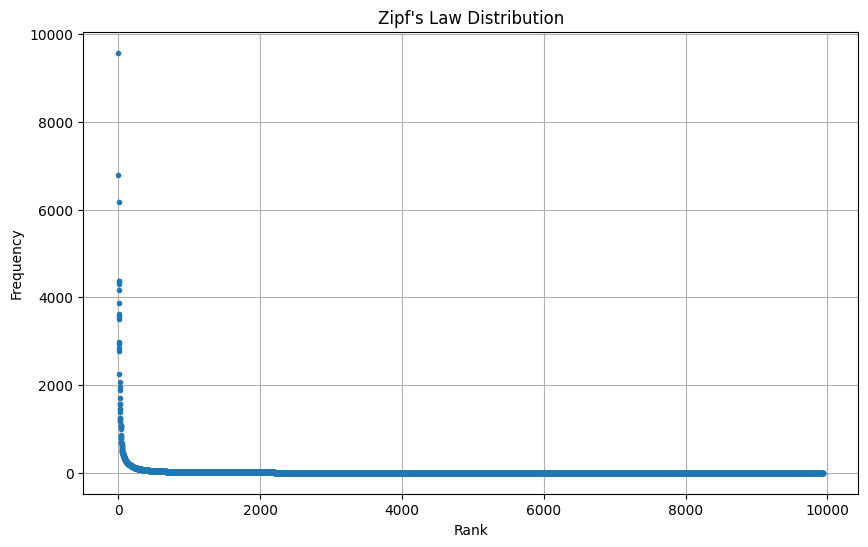

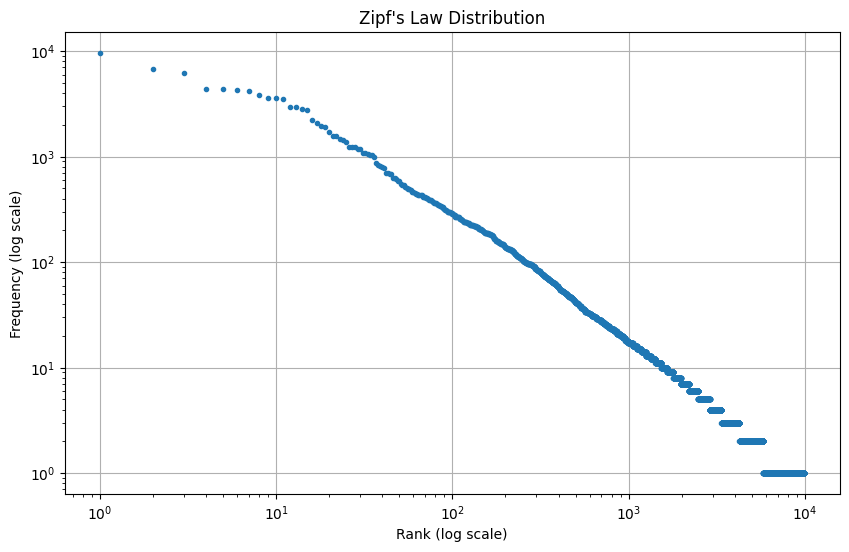

Estimated exponent 's' in Zipf's Law: 1.3265029948536835


In [13]:
##Zipf's Law?

cc_tokens_lower = [word.lower() for word in cc_tokens]
word_frequencies = Counter(cc_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

In [14]:
stop_words=stopwords.words('english')

In [15]:
all_words = [word for word in cc_tokens if word.casefold() not in stop_words]

In [ ]:
# all_words

In [16]:
all_fd=nltk.FreqDist(all_words)

In [17]:
all_fd

FreqDist({'would': 804, 'Maggie': 693, 'one': 659, 'Charlotte': 593, 'might': 578, 'could': 518, 'little': 464, 'even': 448, 'said': 444, 'made': 437, ...})

In [18]:
all_fd.most_common(200)

[('would', 804),
 ('Maggie', 693),
 ('one', 659),
 ('Charlotte', 593),
 ('might', 578),
 ('could', 518),
 ('little', 464),
 ('even', 448),
 ('said', 444),
 ('made', 437),
 ('much', 433),
 ('time', 410),
 ('see', 389),
 ('Assingham', 373),
 ('know', 334),
 ('way', 333),
 ('quite', 322),
 ('come', 312),
 ('make', 296),
 ('still', 292),
 ('like', 290),
 ('yet', 279),
 ('say', 272),
 ('Prince', 266),
 ('really', 261),
 ('moment', 258),
 ('nothing', 255),
 ('think', 255),
 ('question', 252),
 ('never', 252),
 ('always', 249),
 ('something', 248),
 ('fact', 240),
 ('back', 240),
 ('things', 237),
 ('mean', 237),
 ('last', 234),
 ('Fanny', 234),
 ('father', 232),
 ('however', 227),
 ('almost', 224),
 ('without', 224),
 ('eyes', 223),
 ('felt', 217),
 ('Verver', 217),
 ('take', 214),
 ('enough', 213),
 ('must', 213),
 ('thing', 211),
 ('least', 206),
 ('together', 205),
 ('less', 203),
 ('everything', 200),
 ('first', 200),
 ('anything', 199),
 ('good', 194),
 ('knew', 193),
 ('sense', 188),
 

In [19]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      # random_state=4,
                      contour_color='steelblue').generate_from_frequencies(all_fd)

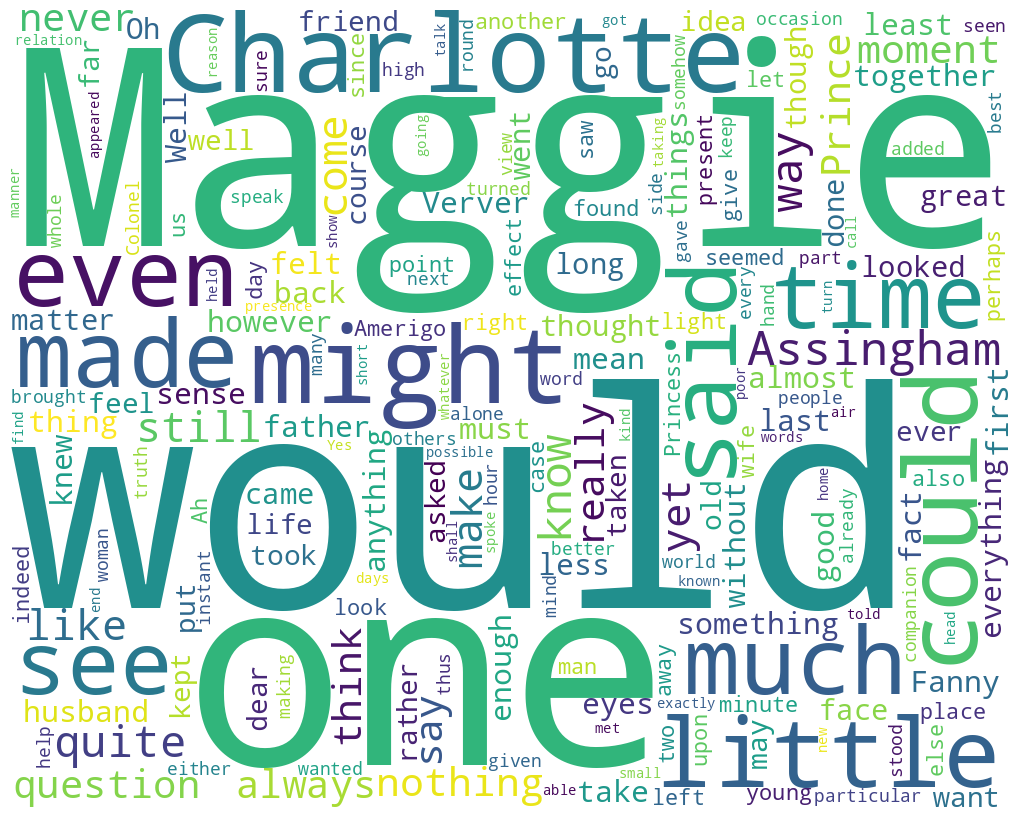

In [20]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [23]:
single_words=all_fd.hapaxes()

In [24]:
import csv
##Saving hapaxes to csv file to read into other notebook for tsne and word2vec

single_words = all_fd.hapaxes()  # Your list of single occurrence words

# Open a file in write mode
with open(my_path+'single_words.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write each word on a new line
    for word in single_words:
        writer.writerow([word])


In [22]:
len(single_words)

4494

In [ ]:
random.choice(single_words)

'attentions'

In [ ]:
top_words = [word for (word, freq) in all_fd.most_common(10)]
print(top_words)

['would', 'Maggie', 'one', 'Charlotte', 'might', 'could', 'little', 'even', 'said', 'made']


<Figure size 1200x900 with 0 Axes>

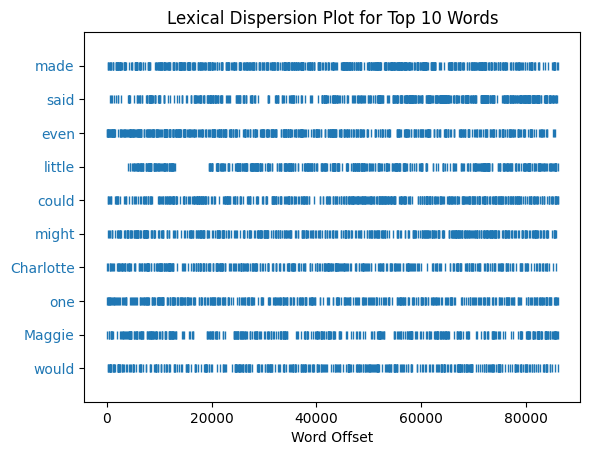

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [ ]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [ ]:
long_words

['pusillanimity',
 'interlocutress',
 'unselfishness',
 'representative',
 'determination',
 'troublesomely',
 'reconsidering',
 'preoccupation',
 'exceptionally',
 'ostentatiously',
 'preponderantly',
 'discriminations',
 'rearrangement',
 'inconspicuous',
 'unresistingly',
 'extraordinary',
 'Conscientiously',
 'understanding',
 'fantastically',
 'administrative',
 'flourishingly',
 'irresponsibly',
 'countrypeople',
 'unembarrassed',
 'contemporaneous',
 'precautionary',
 'insurmountable',
 'distinguished',
 'anniversaries',
 'inconsequently',
 'pronounceable',
 'significantly',
 'punctualities',
 'parliamentary',
 'aesthetically',
 'answerability',
 'interlocutors',
 'theoretically',
 'understatement',
 'commemorative',
 'descriptively',
 'picturesqueness',
 'compassionate',
 'proportionately',
 'substantially',
 'approximation',
 'inexhaustibly',
 'inconveniently',
 'unprotestingly',
 'familiarities',
 'unconventionally',
 'certification',
 'undiscouraged',
 'discriminating',
 'ov

In [ ]:

big_words=sorted(w for w in set(long_words) if len(w) > 8 and all_fd[w] > 5)
len(big_words)

25

<Figure size 1200x900 with 0 Axes>

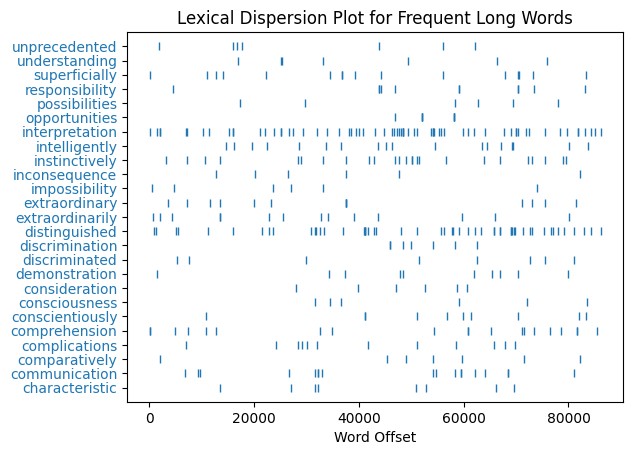

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(cc_tokens)



In [ ]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had'), ('it', 'was'), ('to', 'be'), ('to', 'the'), ('had', 'been'), ('for', 'the'), ('on', 'the'), ('of', 'his'), ('as', 'if'), ('that', 'she'), ('at', 'the'), ('of', 'a'), ('to', 'her'), ('have', 'been'), ('with', 'the'), ('she', 'was'), ('and', 'the'), ('in', 'her'), ('for', 'her'), ('that', 'he'), ('don', 't'), ('as', 'she'), ('It', 'was'), ('didn', 't'), ('a', 'little'), ('of', 'it'), ('I', 've'), ('all', 'the'), ('of', 'their'), ('would', 'have'), ('the', 'Prince'), ('as', 'a'), ('with', 'a'), ('She', 'had'), ('for', 'a'), ('with', 'her'), ('by', 'the'), ('might', 'have'), ('he', 'was'), ('the', 'same'), ('it', 's'), ('I', 'm'), ('from', 'the'), ('that', 'I'), ('that', 'the'), ('in', 'a'), ('of', 'which'), ('as', 'he'), ('was', 'the'), ('her', 'father'), ('so', 'much'), ('would', 'be'), ('I', 'don'), ('it', 'had'), ('was', 'to'), ('It', 's'), ('her', 'own'), ('in', 'his'), ('was', 'a'), ('to', 'have'), ('what', 

In [ ]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had')]

In [ ]:
len(statistical_bigrams)

5

In [ ]:
statistical_bigrams

[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had')]

In [ ]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# cc_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
cc_bigrams = bigrams(cc_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(cc_bigrams)

# Example usage
generate_model(cfd, 'They')  # Replace 'your_seed_word' with your desired starting word


They hadn t got Thank God Only the Thames a more than gay about the 

In [ ]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(cc_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('I', 'don', 't')
('might', 'have', 'been')
('one', 'of', 'the')
('would', 'have', 'been')
('at', 'any', 'rate')
('in', 'the', 'world')
('that', 'she', 'had')
('as', 'if', 'she')
('was', 'as', 'if')
('that', 'he', 'had')


In [ ]:
#

# Onwards to sentences

In [ ]:
with open(my_path+title, 'r') as file:
    all_sentences=sent_tokenize(file.read())#.lower())

In [ ]:
len(all_sentences)

6953

In [ ]:
random.choice(all_sentences)

'They didn’t say so, but it was on the line of giving up Maggie’s present that they practically proceeded--the line of giving it up without more reference to it.'

In [ ]:
all_sentences[0:5]

['       The Prince had always liked his London, when it had come to him; he was one of the modern Romans who find by the Thames a more convincing image of the truth of the ancient state than any they have left by the Tiber.',
 'Brought up on the legend of the City to which the world paid tribute, he recognised in the present London much more than in contemporary Rome the real dimensions of such a case.',
 'If it was a question of an Imperium, he said to himself, and if one wished, as a Roman, to recover a little the sense of that, the place to do so was on London Bridge, or even, on a fine afternoon in May, at Hyde Park Corner.',
 'It was not indeed to either of those places that these grounds of his predilection, after all sufficiently vague, had, at the moment we are concerned with him, guided his steps; he had strayed, simply enough, into Bond Street, where his imagination, working at comparatively short range, caused him now and then to stop before a window in which objects massiv

In [ ]:
# all_sentences = [sentence.replace("\n", " ") for sentence in all_sentences]


In [ ]:
temp=random.choice(all_sentences)

In [ ]:
# Sentence to be tagged
sentence = random.choice(all_sentences)
# sentence="See Spot run."
print(sentence)

# Tokenizing and tagging
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

# Print the tagged sentence
tagged



She didn’t, however, as she gave him back the little unfolded leaf, say they were enough--though he saw, the next moment, that her silence was probably not disconnected from her having just visibly turned pale.


[('She', 'PRP'),
 ('didn', 'VBZ'),
 ('’', 'JJ'),
 ('t', 'NN'),
 (',', ','),
 ('however', 'RB'),
 (',', ','),
 ('as', 'IN'),
 ('she', 'PRP'),
 ('gave', 'VBD'),
 ('him', 'PRP'),
 ('back', 'RP'),
 ('the', 'DT'),
 ('little', 'JJ'),
 ('unfolded', 'JJ'),
 ('leaf', 'NN'),
 (',', ','),
 ('say', 'VBP'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('enough', 'RB'),
 ('--', ':'),
 ('though', 'IN'),
 ('he', 'PRP'),
 ('saw', 'VBD'),
 (',', ','),
 ('the', 'DT'),
 ('next', 'JJ'),
 ('moment', 'NN'),
 (',', ','),
 ('that', 'IN'),
 ('her', 'PRP$'),
 ('silence', 'NN'),
 ('was', 'VBD'),
 ('probably', 'RB'),
 ('not', 'RB'),
 ('disconnected', 'VBN'),
 ('from', 'IN'),
 ('her', 'PRP$'),
 ('having', 'VBG'),
 ('just', 'RB'),
 ('visibly', 'RB'),
 ('turned', 'JJ'),
 ('pale', 'NN'),
 ('.', '.')]

In [ ]:
print(tagged)

[('She', 'PRP'), ('didn', 'VBZ'), ('’', 'JJ'), ('t', 'NN'), (',', ','), ('however', 'RB'), (',', ','), ('as', 'IN'), ('she', 'PRP'), ('gave', 'VBD'), ('him', 'PRP'), ('back', 'RP'), ('the', 'DT'), ('little', 'JJ'), ('unfolded', 'JJ'), ('leaf', 'NN'), (',', ','), ('say', 'VBP'), ('they', 'PRP'), ('were', 'VBD'), ('enough', 'RB'), ('--', ':'), ('though', 'IN'), ('he', 'PRP'), ('saw', 'VBD'), (',', ','), ('the', 'DT'), ('next', 'JJ'), ('moment', 'NN'), (',', ','), ('that', 'IN'), ('her', 'PRP$'), ('silence', 'NN'), ('was', 'VBD'), ('probably', 'RB'), ('not', 'RB'), ('disconnected', 'VBN'), ('from', 'IN'), ('her', 'PRP$'), ('having', 'VBG'), ('just', 'RB'), ('visibly', 'RB'), ('turned', 'JJ'), ('pale', 'NN'), ('.', '.')]


In [ ]:
# A simple grammar to create tree
grammar = "NP: {<JJ><NN>}"

In [ ]:
# Create tree
parser = nltk.RegexpParser(grammar)
tree = parser.parse(words_tagged)
print(tree)

NameError: ignored

In [ ]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [ ]:
!pip install graphviz
import graphviz

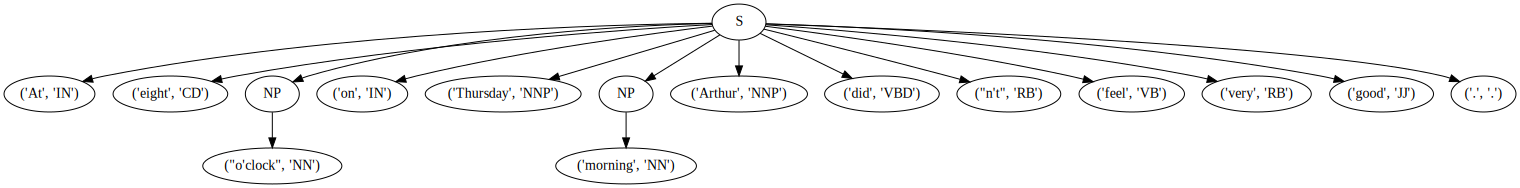

In [ ]:
# Define a simple grammar
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Create a parser
cp = nltk.RegexpParser(grammar)

# Parse the sentence
tree = cp.parse(tagged)



# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display
dot_source = to_graphviz(tree)
display(dot_source)

In [ ]:
print(treebank.parsed_sents()[0])
print(treebank.parsed_sents()[1])

NameError: ignored

In [ ]:
text1="Wikipedia is a free online encylopedia, created by and edited by volunteers around the world and hosted by the Wikipedia Foundation"

In [ ]:
print(text1)

Wikipedia is a free online encylopedia, created by and edited by volunteers around the world and hosted by the Wikipedia Foundation


In [ ]:
words1=nltk.word_tokenize(text1)

In [ ]:
print(words1)

['Wikipedia', 'is', 'a', 'free', 'online', 'encylopedia', ',', 'created', 'by', 'and', 'edited', 'by', 'volunteers', 'around', 'the', 'world', 'and', 'hosted', 'by', 'the', 'Wikipedia', 'Foundation']


In [ ]:
len(words1)

22

In [ ]:
nltk.pos_tag(words1)

[('Wikipedia', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('free', 'JJ'),
 ('online', 'NN'),
 ('encylopedia', 'NN'),
 (',', ','),
 ('created', 'VBN'),
 ('by', 'IN'),
 ('and', 'CC'),
 ('edited', 'VBN'),
 ('by', 'IN'),
 ('volunteers', 'NNS'),
 ('around', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('and', 'CC'),
 ('hosted', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('Wikipedia', 'NNP'),
 ('Foundation', 'NNP')]

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
nltk.help.upenn_tagset("NNS")

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


# Diving into a treebank
Following this [video](https://youtu.be/EfVbaPuwKpM?si=Rw5iF5kvUlkexA-6)

In [ ]:
import nltk.corpus

In [ ]:
nltk.corpus.treebank.fileids()[:10]


['wsj_0001.mrg',
 'wsj_0002.mrg',
 'wsj_0003.mrg',
 'wsj_0004.mrg',
 'wsj_0005.mrg',
 'wsj_0006.mrg',
 'wsj_0007.mrg',
 'wsj_0008.mrg',
 'wsj_0009.mrg',
 'wsj_0010.mrg']

In [ ]:
from nltk.corpus import treebank

In [ ]:
treebank.words('wsj_0007.mrg')

['McDermott', 'International', 'Inc.', 'said', '0', ...]

In [ ]:
print(treebank.tagged_words('wsj_0007.mrg'))

[('McDermott', 'NNP'), ('International', 'NNP'), ...]


In [ ]:
print(treebank.parsed_sents('wsj_0007.mrg'))

[Tree('S', [Tree('NP-SBJ', [Tree('NNP', ['McDermott']), Tree('NNP', ['International']), Tree('NNP', ['Inc.'])]), Tree('VP', [Tree('VBD', ['said']), Tree('SBAR', [Tree('-NONE-', ['0']), Tree('S', [Tree('NP-SBJ', [Tree('PRP$', ['its']), Tree('NNP', ['Babcock']), Tree('CC', ['&']), Tree('NNP', ['Wilcox']), Tree('NN', ['unit'])]), Tree('VP', [Tree('VBD', ['completed']), Tree('NP', [Tree('NP', [Tree('DT', ['the']), Tree('NN', ['sale'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('PRP$', ['its']), Tree('NNP', ['Bailey']), Tree('NNP', ['Controls']), Tree('NNP', ['Operations'])])]), Tree('PP', [Tree('TO', ['to']), Tree('NP', [Tree('NNP', ['Finmeccanica']), Tree('NNP', ['S.p']), Tree('.', ['.']), Tree('NNP', ['A.'])])]), Tree('PP', [Tree('IN', ['for']), Tree('NP', [Tree('QP', [Tree('$', ['$']), Tree('CD', ['295']), Tree('CD', ['million'])]), Tree('-NONE-', ['*U*'])])])])])])])]), Tree('.', ['.'])]), Tree('S', [Tree('NP-SBJ', [Tree('NNP', ['Finmeccanica'])]), Tree('VP', [Tree('VBZ', ['is

In [ ]:
from nltk.corpus import treebank_chunk
treebank_chunk.chunked_sents()

[Tree('S', [Tree('NP', [('Pierre', 'NNP'), ('Vinken', 'NNP')]), (',', ','), Tree('NP', [('61', 'CD'), ('years', 'NNS')]), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), Tree('NP', [('the', 'DT'), ('board', 'NN')]), ('as', 'IN'), Tree('NP', [('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD')]), ('.', '.')]), Tree('S', [Tree('NP', [('Mr.', 'NNP'), ('Vinken', 'NNP')]), ('is', 'VBZ'), Tree('NP', [('chairman', 'NN')]), ('of', 'IN'), Tree('NP', [('Elsevier', 'NNP'), ('N.V.', 'NNP')]), (',', ','), Tree('NP', [('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN')]), ('.', '.')]), ...]

In [ ]:
treebank_chunk.chunked_sents()[1].pos()

[(('Mr.', 'NNP'), 'NP'),
 (('Vinken', 'NNP'), 'NP'),
 (('is', 'VBZ'), 'S'),
 (('chairman', 'NN'), 'NP'),
 (('of', 'IN'), 'S'),
 (('Elsevier', 'NNP'), 'NP'),
 (('N.V.', 'NNP'), 'NP'),
 ((',', ','), 'S'),
 (('the', 'DT'), 'NP'),
 (('Dutch', 'NNP'), 'NP'),
 (('publishing', 'VBG'), 'NP'),
 (('group', 'NN'), 'NP'),
 (('.', '.'), 'S')]

In [ ]:
len(treebank_chunk.chunked_sents())

4009

In [ ]:
chunked_sentence = treebank_chunk.chunked_sents()[1]
chunked_sentence.pretty_print()


                                                 S                                                                        
   ______________________________________________|___________________________________________                              
  |      |    |   |           NP                 NP                   NP                     NP                           
  |      |    |   |      _____|______            |            ________|_____         ________|_______________________      
is/VBZ of/IN ,/, ./. Mr./NNP     Vinken/NNP chairman/NN Elsevier/NNP     N.V./NNP the/DT Dutch/NNP publishing/VBG group/NN



In [ ]:
 print(treebank_chunk.chunked_sents()[1].productions)

<bound method Tree.productions of Tree('S', [Tree('NP', [('Mr.', 'NNP'), ('Vinken', 'NNP')]), ('is', 'VBZ'), Tree('NP', [('chairman', 'NN')]), ('of', 'IN'), Tree('NP', [('Elsevier', 'NNP'), ('N.V.', 'NNP')]), (',', ','), Tree('NP', [('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN')]), ('.', '.')])>


In [ ]:
print(treebank.tagged_words())

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


In [ ]:

from nltk.probability import FreqDist
from nltk.corpus import treebank
fd = FreqDist()
fd.items()

dict_items([])

In [ ]:
words = treebank.words()
words

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]

In [ ]:
fd=FreqDist(words)

In [ ]:
fd_items = fd.items()
# This will give you a list of tuples where each tuple is (word, frequency)


In [ ]:
fd_items

In [ ]:
fd.most_common(10)

[(',', 4885),
 ('the', 4045),
 ('.', 3828),
 ('of', 2319),
 ('to', 2164),
 ('a', 1878),
 ('in', 1572),
 ('and', 1511),
 ('*-1', 1123),
 ('0', 1099)]

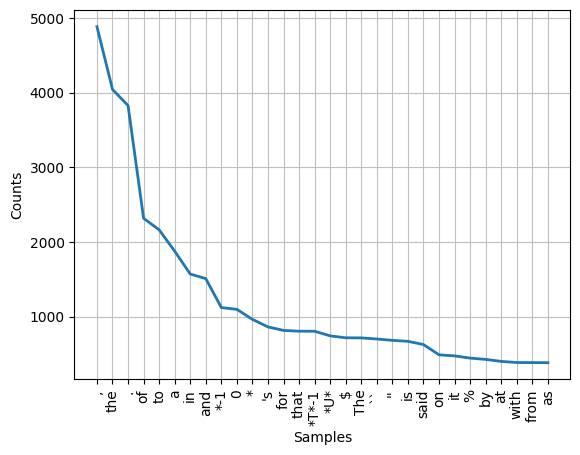

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fd.plot(30, cumulative=False)  # Plots the frequency of the top 30 words


In [ ]:
nltk.download('sinica_treebank')
from nltk.corpus import sinica_treebank


[nltk_data] Downloading package sinica_treebank to /root/nltk_data...
[nltk_data]   Package sinica_treebank is already up-to-date!


In [ ]:
print(sinica_treebank.sents())

[['一'], ['友情'], ['嘉珍', '和', '我', '住在', '同一條', '巷子'], ...]


# Training POS Taggers

In [ ]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
from nltk.corpus import treebank
sentences = treebank.tagged_sents()
print(f"Number of sentences in bank is ",len(sentences))

Number of sentences in bank is  3914


In [ ]:
train_data = sentences[:int(len(sentences) * 0.8)]
test_data = sentences[int(len(sentences) * 0.8):]


In [ ]:
len(test_data)

783

In [ ]:
train_data[1]

[('Mr.', 'NNP'),
 ('Vinken', 'NNP'),
 ('is', 'VBZ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Elsevier', 'NNP'),
 ('N.V.', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'NNP'),
 ('publishing', 'VBG'),
 ('group', 'NN'),
 ('.', '.')]

In [ ]:
from nltk.tag import UnigramTagger
unigram_tagger = UnigramTagger(train_data)
from nltk.metrics import accuracy



In [ ]:
gold_tags = [tag for sent in test_data for _, tag in sent]
gold_tags

In [ ]:
from nltk.tag import UnigramTagger
unigram_tagger = UnigramTagger(train_data)


In [ ]:
predicted_tags = [tag for sent in test_data for _, tag in unigram_tagger.tag([word for word, _ in sent])]



In [ ]:
accuracy_score = accuracy(gold_tags, predicted_tags)
print(f"Accuracy: {accuracy_score}")


Accuracy: 0.8608213982733669


In [ ]:
sentence = ["This", "is", "a", "sample", "sentence"]
tagged_sentence = unigram_tagger.tag(sentence)
print(tagged_sentence)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', None), ('sentence', None)]


In [ ]:
from nltk.tag import BigramTagger, UnigramTagger
unigram_tagger = UnigramTagger(train_data)
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)


In [ ]:
sentence = ["This", "is", "a", "sample", "sentence"]
tagged_sentence = bigram_tagger.tag(sentence)
print(tagged_sentence)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', None), ('sentence', None)]


In [ ]:
# Preparing gold and predicted tags
gold_tags = [tag for sent in test_data for _, tag in sent]
predicted_tags = [tag for sent in test_data for _, tag in bigram_tagger.tag([word for word, _ in sent])]

# Calculate accuracy
accuracy_score = accuracy(gold_tags, predicted_tags)
print(f"Accuracy: {accuracy_score}")


Accuracy: 0.8679075802185737


In [ ]:
from nltk.tag import hmm
# Initialize the trainer for the HMM Tagger
trainer = hmm.HiddenMarkovModelTrainer()

# Train the HMM Tagger using the training data
hmm_tagger = trainer.train_supervised(train_data)


In [ ]:
# Preparing gold and predicted tags
gold_tags = [tag for sent in test_data for _, tag in sent]
predicted_tags = [tag for sent in test_data for _, tag in hmm_tagger.tag([word for word, _ in sent])]

# Calculate accuracy manually
correct_tags = sum(g == p for g, p in zip(gold_tags, predicted_tags))
accuracy_score = correct_tags / len(gold_tags)
print(f"Accuracy: {accuracy_score}")


Accuracy: 0.3647387594191327


In [ ]:
sentence = ["This", "is", "a", "sample", "sentence"]
tagged_sentence = hmm_tagger.tag(sentence)
print(tagged_sentence)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'NNP'), ('sentence', 'NNP')]


In [ ]:
nltk.download('averaged_perceptron_tagger')

sentence = ["This", "is", "a", "sample", "sentence"]

# Use NLTK's default POS tagger
tagged_sentence = nltk.pos_tag(sentence)
print(tagged_sentence)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN')]


In [ ]:
# Preparing gold and predicted tags
gold_tags = [tag for sent in test_data for _, tag in sent]
predicted_tags = [tag for sent in test_data for _, tag in nltk.pos_tag([word for word, _ in sent])]

# Calculate accuracy manually
correct_tags = sum(g == p for g, p in zip(gold_tags, predicted_tags))
accuracy_score = correct_tags / len(gold_tags)
print(f"Accuracy: {accuracy_score}")



Accuracy: 0.8937072708218973


In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('syzygy')

[Synset('syzygy.n.01')]

In [ ]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [ ]:
wn.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[1]

Synset('beach_wagon.n.01')

In [ ]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
print(len(paths))
[synset.name() for synset in paths[0]]

2


['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']